# TWITTER SENTIMENT ANALYSIS

## Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In [2]:
#installing important libraries in the system
!pip install nltk
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anirudh Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nlt

## Twitter data contains a bunch of information parameters. Sometimes, the data contain unnecessary things that need to be cleaned, such as unnecessary characters, links, newlines, and other kinds of stuff.

## Firstly, you need to import the modules needed. We’re going to use 4 modules here:

### Pandas, to open data files and to apply certain operations to the data.

### Html, to decode HTML entities into regular characters.

### Re, to filter and delete unnecessary links, hash, username, punctuations or whatever you wish.

### Nltk, to clean stopwords.

In [3]:
#importing required libraries
import pandas as pd 
import numpy as np
import html
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [7]:
# reading csv file
 
data = pd.read_csv("F:/Technocolabs intern/final datasets/AppleData_masterFile.csv")
data

,Datetime,Text
0,2020-06-29 22:56:32+00:00,"#GBPAUD 145 PIPS Profit🔥🔥\n\nFor free signals,..."
1,2020-06-29 22:20:05+00:00,APPLE ANALYSIS 15 MIN (BUY S...
2,2020-06-29 21:35:23+00:00,EURNZD TP2 Hit! 180 PIPS PROFIT 🔥👍🏻⚡️\n\nFor F...
3,2020-06-29 21:17:03+00:00,"Apple Inc price at close, 2020-06-29, is 361.7..."
4,2020-06-29 20:40:54+00:00,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nChecko...
...,...,...
33363,2021-01-01 12:55:44+00:00,@NiemotkaMike @TraderNickyBAT Gains: #AAPL and...
33364,2021-01-01 06:58:35+00:00,Not all flowers were bloom together. If not #s...
33365,2021-01-01 05:40:03+00:00,Ending this year with small Boom .. #BABA #AAP...
33366,2021-01-01 05:05:52+00:00,"If you #trade #stocks like #FB, #AAPL, #AMZN, ..."


In [6]:
data.shape

(33368, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33368 entries, 0 to 33367
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  33368 non-null  object
 1   Text      33367 non-null  object
dtypes: object(2)
memory usage: 521.5+ KB


In [9]:
# deleting null values
data = data.dropna()
data

,Datetime,Text
0,2020-06-29 22:56:32+00:00,"#GBPAUD 145 PIPS Profit🔥🔥\n\nFor free signals,..."
1,2020-06-29 22:20:05+00:00,APPLE ANALYSIS 15 MIN (BUY S...
2,2020-06-29 21:35:23+00:00,EURNZD TP2 Hit! 180 PIPS PROFIT 🔥👍🏻⚡️\n\nFor F...
3,2020-06-29 21:17:03+00:00,"Apple Inc price at close, 2020-06-29, is 361.7..."
4,2020-06-29 20:40:54+00:00,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nChecko...
...,...,...
33362,2021-01-01 14:57:32+00:00,https://t.co/tHNQwFRqRZ get free stocks for 2...
33363,2021-01-01 12:55:44+00:00,@NiemotkaMike @TraderNickyBAT Gains: #AAPL and...
33364,2021-01-01 06:58:35+00:00,Not all flowers were bloom together. If not #s...
33365,2021-01-01 05:40:03+00:00,Ending this year with small Boom .. #BABA #AAP...


In [11]:
# cleaning unnecessary text from data
data.Text = data.Text.str.lower() #convert text to lower case
data.Text = data.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
data.Text = data.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
data.Text = data.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
data.Text = data.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
data

,Datetime,Text
0,2020-06-29 22:56:32+00:00,gbpaud 145 pips profit\n\nfor free signals join
1,2020-06-29 22:20:05+00:00,apple analysis 15 min buy si...
2,2020-06-29 21:35:23+00:00,eurnzd tp2 hit 180 pips profit \n\nfor forex s...
3,2020-06-29 21:17:03+00:00,apple inc price at close 20200629 is 36178 app...
4,2020-06-29 20:40:54+00:00,nzdcad target hit 90 pips profit \n\ncheckout ...
...,...,...
33362,2021-01-01 14:57:32+00:00,
33363,2021-01-01 12:55:44+00:00,gains aapl and pltr losses amd and sfix
33364,2021-01-01 06:58:35+00:00,not all flowers were bloom together if not suc...
33365,2021-01-01 05:40:03+00:00,ending this year with small boom baba aapl nf...


In [13]:
#sorting the data datewise
data1 = data.sort_values(['Datetime'])
data1.head()

,Datetime,Text
7063,2020-01-01 00:24:13+00:00,4 1 hour charts for all 78 instruments are a...
7062,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...
7061,2020-01-01 01:24:41+00:00,4 1 hour charts for the group 3 instruments a...
7060,2020-01-01 01:26:34+00:00,4 1 hour charts for all 78 instruments are av...
7059,2020-01-01 01:30:11+00:00,made one big mistake day trading apple aapl th...


# DATA VISUALISATION

In [23]:
import textblob as TextBlob

# Using Wordcloud

## Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

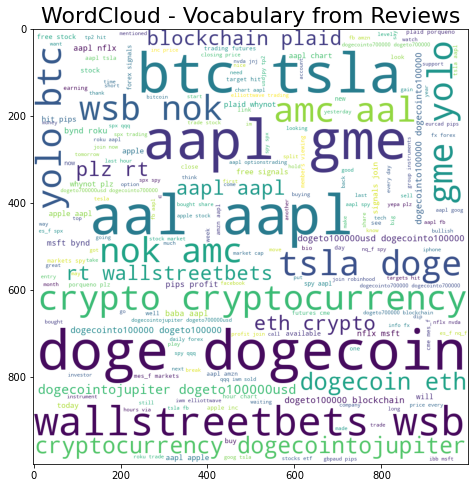

In [19]:
from wordcloud import WordCloud
allwords= ' '.join(twts for twts in data1['Text'] )
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(allwords)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

# Analysing Polarity and Subjectivity 

## The sentiment function of textblob returns two properties, polarity, and subjectivity.Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. The sentiment function of textblob returns two properties, polarity, and subjectivity.Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [28]:
from textblob import TextBlob

In [29]:
def getSubjectivity(data1):
    return TextBlob(data1).sentiment.subjectivity
def getPolarity(data1):
    return TextBlob(data1).sentiment.polarity

data1['Subjectivity'] = data1['Text'].apply(getSubjectivity)
data1['Polarity'] = data1['Text'].apply(getPolarity)
data1

,Datetime,Text,Subjectivity,Polarity
7063,2020-01-01 00:24:13+00:00,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000
7062,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...,0.450000,0.225000
7061,2020-01-01 01:24:41+00:00,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000
7060,2020-01-01 01:26:34+00:00,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000
7059,2020-01-01 01:30:11+00:00,made one big mistake day trading apple aapl th...,0.100000,0.000000
...,...,...,...,...
19501,2021-09-20 22:10:27+00:00,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000
19500,2021-09-20 22:15:53+00:00,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000
19499,2021-09-20 23:15:03+00:00,now if only any of us outside the us could g...,0.395139,-0.010417
7064,Datetime,text,0.000000,0.000000


# Analysing the tweets 

In [30]:
def getAnalysis(score):
    if score < 0:
        return 'Negitive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data1['Analysis'] = data1['Polarity'].apply(getAnalysis)
data1



,Datetime,Text,Subjectivity,Polarity,Analysis
7063,2020-01-01 00:24:13+00:00,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,Positive
7062,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive
7061,2020-01-01 01:24:41+00:00,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,Positive
7060,2020-01-01 01:26:34+00:00,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,Positive
7059,2020-01-01 01:30:11+00:00,made one big mistake day trading apple aapl th...,0.100000,0.000000,Neutral
...,...,...,...,...,...
19501,2021-09-20 22:10:27+00:00,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,Neutral
19500,2021-09-20 22:15:53+00:00,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,Neutral
19499,2021-09-20 23:15:03+00:00,now if only any of us outside the us could g...,0.395139,-0.010417,Negitive
7064,Datetime,text,0.000000,0.000000,Neutral


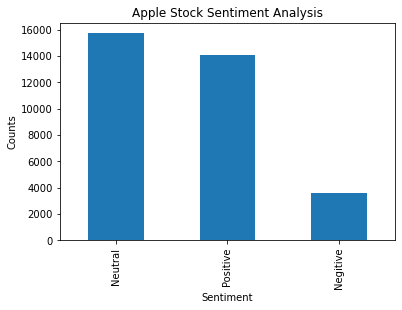

In [37]:
data1['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# MANIPULATING THE DATE AND TIME COLUMN

In [31]:
data1['Datetime'] = data1['Datetime'].apply(lambda x:x[:19])

In [33]:
a = list(data1["Datetime"].apply(lambda x:len(x)>4))

In [34]:
data1["Date"] = pd.to_datetime(data1["Datetime"],errors="coerce")

In [35]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
7063,2020-01-01 00:24:13,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,Positive,2020-01-01 00:24:13
7062,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57
7061,2020-01-01 01:24:41,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,Positive,2020-01-01 01:24:41
7060,2020-01-01 01:26:34,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,Positive,2020-01-01 01:26:34
7059,2020-01-01 01:30:11,made one big mistake day trading apple aapl th...,0.100000,0.000000,Neutral,2020-01-01 01:30:11
...,...,...,...,...,...,...
19501,2021-09-20 22:10:27,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,Neutral,2021-09-20 22:10:27
19500,2021-09-20 22:15:53,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,Neutral,2021-09-20 22:15:53
19499,2021-09-20 23:15:03,now if only any of us outside the us could g...,0.395139,-0.010417,Negitive,2021-09-20 23:15:03
7064,Datetime,text,0.000000,0.000000,Neutral,NaT


In [39]:
data2 = pd.get_dummies(data1['Analysis'])
data2

,Negitive,Neutral,Positive
7063,0,0,1
7062,0,0,1
7061,0,0,1
7060,0,0,1
7059,0,1,0
...,...,...,...
19501,0,1,0
19500,0,1,0
19499,1,0,0
7064,0,1,0


In [40]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
7063,2020-01-01 00:24:13,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,Positive,2020-01-01 00:24:13
7062,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57
7061,2020-01-01 01:24:41,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,Positive,2020-01-01 01:24:41
7060,2020-01-01 01:26:34,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,Positive,2020-01-01 01:26:34
7059,2020-01-01 01:30:11,made one big mistake day trading apple aapl th...,0.100000,0.000000,Neutral,2020-01-01 01:30:11
...,...,...,...,...,...,...
19501,2021-09-20 22:10:27,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,Neutral,2021-09-20 22:10:27
19500,2021-09-20 22:15:53,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,Neutral,2021-09-20 22:15:53
19499,2021-09-20 23:15:03,now if only any of us outside the us could g...,0.395139,-0.010417,Negitive,2021-09-20 23:15:03
7064,Datetime,text,0.000000,0.000000,Neutral,NaT


In [41]:
data3 = pd.concat([data1,data2],axis=1)
data3

,Datetime,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
7063,2020-01-01 00:24:13,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,Positive,2020-01-01 00:24:13,0,0,1
7062,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57,0,0,1
7061,2020-01-01 01:24:41,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,Positive,2020-01-01 01:24:41,0,0,1
7060,2020-01-01 01:26:34,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,Positive,2020-01-01 01:26:34,0,0,1
7059,2020-01-01 01:30:11,made one big mistake day trading apple aapl th...,0.100000,0.000000,Neutral,2020-01-01 01:30:11,0,1,0
...,...,...,...,...,...,...,...,...,...
19501,2021-09-20 22:10:27,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,Neutral,2021-09-20 22:10:27,0,1,0
19500,2021-09-20 22:15:53,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,Neutral,2021-09-20 22:15:53,0,1,0
19499,2021-09-20 23:15:03,now if only any of us outside the us could g...,0.395139,-0.010417,Negitive,2021-09-20 23:15:03,1,0,0
7064,Datetime,text,0.000000,0.000000,Neutral,NaT,0,1,0


In [42]:
data3 = data3.drop(['Datetime'],axis=1)
data3.head()

,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
7063,4 1 hour charts for all 78 instruments are a...,0.40,0.400,Positive,2020-01-01 00:24:13,0,0,1
7062,top 10 trades of the decade number 4 going lon...,0.45,0.225,Positive,2020-01-01 00:56:57,0,0,1
7061,4 1 hour charts for the group 3 instruments a...,0.40,0.400,Positive,2020-01-01 01:24:41,0,0,1
7060,4 1 hour charts for all 78 instruments are av...,0.40,0.400,Positive,2020-01-01 01:26:34,0,0,1
7059,made one big mistake day trading apple aapl th...,0.10,0.000,Neutral,2020-01-01 01:30:11,0,1,0


In [43]:
data3['Year'] = data3['Date'].dt.year
data3['Month'] = data3['Date'].dt.month
data3['Day'] = data3['Date'].dt.day
data3


,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
7063,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,Positive,2020-01-01 00:24:13,0,0,1,2020.0,1.0,1.0
7062,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
7061,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,Positive,2020-01-01 01:24:41,0,0,1,2020.0,1.0,1.0
7060,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,Positive,2020-01-01 01:26:34,0,0,1,2020.0,1.0,1.0
7059,made one big mistake day trading apple aapl th...,0.100000,0.000000,Neutral,2020-01-01 01:30:11,0,1,0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19501,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,Neutral,2021-09-20 22:10:27,0,1,0,2021.0,9.0,20.0
19500,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,Neutral,2021-09-20 22:15:53,0,1,0,2021.0,9.0,20.0
19499,now if only any of us outside the us could g...,0.395139,-0.010417,Negitive,2021-09-20 23:15:03,1,0,0,2021.0,9.0,20.0
7064,text,0.000000,0.000000,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [69]:
data20 = data3.drop(['Text', 'Subjectivity','Polarity',	'Analysis',	'Date',	'Negitive',	'Neutral',	'Positive'],axis=1)
data20

,StockName,Year,Month,Day
7063,APPLE,2020.0,1.0,1.0
7062,APPLE,2020.0,1.0,1.0
7061,APPLE,2020.0,1.0,1.0
7060,APPLE,2020.0,1.0,1.0
7059,APPLE,2020.0,1.0,1.0
...,...,...,...,...
19501,APPLE,2021.0,9.0,20.0
19500,APPLE,2021.0,9.0,20.0
19499,APPLE,2021.0,9.0,20.0
7064,APPLE,NaN,NaN,NaN


In [73]:
data21=data20.drop(['StockName'],axis=1)
data21

,Year,Month,Day
7063,2020.0,1.0,1.0
7062,2020.0,1.0,1.0
7061,2020.0,1.0,1.0
7060,2020.0,1.0,1.0
7059,2020.0,1.0,1.0
...,...,...,...
19501,2021.0,9.0,20.0
19500,2021.0,9.0,20.0
19499,2021.0,9.0,20.0
7064,NaN,NaN,NaN


In [44]:
data3.insert(3, 'StockName', 'APPLE')
data3

,Text,Subjectivity,Polarity,StockName,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
7063,4 1 hour charts for all 78 instruments are a...,0.400000,0.400000,APPLE,Positive,2020-01-01 00:24:13,0,0,1,2020.0,1.0,1.0
7062,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,APPLE,Positive,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
7061,4 1 hour charts for the group 3 instruments a...,0.400000,0.400000,APPLE,Positive,2020-01-01 01:24:41,0,0,1,2020.0,1.0,1.0
7060,4 1 hour charts for all 78 instruments are av...,0.400000,0.400000,APPLE,Positive,2020-01-01 01:26:34,0,0,1,2020.0,1.0,1.0
7059,made one big mistake day trading apple aapl th...,0.100000,0.000000,APPLE,Neutral,2020-01-01 01:30:11,0,1,0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19501,aapl 20210917 weekly price pattern coordinates...,0.000000,0.000000,APPLE,Neutral,2021-09-20 22:10:27,0,1,0,2021.0,9.0,20.0
19500,apple inc price at close 20210920 is 14294 app...,0.000000,0.000000,APPLE,Neutral,2021-09-20 22:15:53,0,1,0,2021.0,9.0,20.0
19499,now if only any of us outside the us could g...,0.395139,-0.010417,APPLE,Negitive,2021-09-20 23:15:03,1,0,0,2021.0,9.0,20.0
7064,text,0.000000,0.000000,APPLE,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [45]:
data4 = data3.drop(['Text', 'Subjectivity', 'Polarity','Analysis'], axis = 1)
data4

,StockName,Date,Negitive,Neutral,Positive,Year,Month,Day
7063,APPLE,2020-01-01 00:24:13,0,0,1,2020.0,1.0,1.0
7062,APPLE,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
7061,APPLE,2020-01-01 01:24:41,0,0,1,2020.0,1.0,1.0
7060,APPLE,2020-01-01 01:26:34,0,0,1,2020.0,1.0,1.0
7059,APPLE,2020-01-01 01:30:11,0,1,0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...
19501,APPLE,2021-09-20 22:10:27,0,1,0,2021.0,9.0,20.0
19500,APPLE,2021-09-20 22:15:53,0,1,0,2021.0,9.0,20.0
19499,APPLE,2021-09-20 23:15:03,1,0,0,2021.0,9.0,20.0
7064,APPLE,NaT,0,1,0,NaN,NaN,NaN


In [46]:
data5 = data4.drop(['Year','Month','Day'], axis = 1)
data5

,StockName,Date,Negitive,Neutral,Positive
7063,APPLE,2020-01-01 00:24:13,0,0,1
7062,APPLE,2020-01-01 00:56:57,0,0,1
7061,APPLE,2020-01-01 01:24:41,0,0,1
7060,APPLE,2020-01-01 01:26:34,0,0,1
7059,APPLE,2020-01-01 01:30:11,0,1,0
...,...,...,...,...,...
19501,APPLE,2021-09-20 22:10:27,0,1,0
19500,APPLE,2021-09-20 22:15:53,0,1,0
19499,APPLE,2021-09-20 23:15:03,1,0,0
7064,APPLE,NaT,0,1,0


In [47]:
data6 = data5.groupby([data4['Date'].dt.date]).sum()
data6

,Negitive,Neutral,Positive
Date,,,
2020-01-01,2.0,8.0,10.0
2020-01-02,11.0,32.0,41.0
2020-01-03,9.0,13.0,22.0
2020-01-04,1.0,8.0,3.0
2020-01-05,1.0,9.0,4.0
...,...,...,...
2021-09-16,6.0,14.0,19.0
2021-09-17,8.0,13.0,10.0
2021-09-18,3.0,6.0,12.0


In [50]:
data6.head()

,Negitive,Stockname,Neutral,Positive
Date,,,,
2020-01-01,2.0,Apple,8.0,10.0
2020-01-02,11.0,Apple,32.0,41.0
2020-01-03,9.0,Apple,13.0,22.0
2020-01-04,1.0,Apple,8.0,3.0
2020-01-05,1.0,Apple,9.0,4.0


In [51]:
data6['Total Tweets'] = data6['Positive']+  data6['Negitive']+  data6['Neutral']
data6 

,Negitive,Stockname,Neutral,Positive,Total Tweets
Date,,,,,
2020-01-01,2.0,Apple,8.0,10.0,20.0
2020-01-02,11.0,Apple,32.0,41.0,84.0
2020-01-03,9.0,Apple,13.0,22.0,44.0
2020-01-04,1.0,Apple,8.0,3.0,12.0
2020-01-05,1.0,Apple,9.0,4.0,14.0
...,...,...,...,...,...
2021-09-16,6.0,Apple,14.0,19.0,39.0
2021-09-17,8.0,Apple,13.0,10.0,31.0
2021-09-18,3.0,Apple,6.0,12.0,21.0


In [52]:
data7 = data6.reset_index()
data7

,Date,Negitive,Stockname,Neutral,Positive,Total Tweets
0,2020-01-01,2.0,Apple,8.0,10.0,20.0
1,2020-01-02,11.0,Apple,32.0,41.0,84.0
2,2020-01-03,9.0,Apple,13.0,22.0,44.0
3,2020-01-04,1.0,Apple,8.0,3.0,12.0
4,2020-01-05,1.0,Apple,9.0,4.0,14.0
...,...,...,...,...,...,...
622,2021-09-16,6.0,Apple,14.0,19.0,39.0
623,2021-09-17,8.0,Apple,13.0,10.0,31.0
624,2021-09-18,3.0,Apple,6.0,12.0,21.0
625,2021-09-19,4.0,Apple,9.0,11.0,24.0


In [66]:
data8 = data7[['Date', 'Stockname','Positive','Neutral' , 'Negitive','Total Tweets']]
data8

,Date,Stockname,Positive,Neutral,Negitive,Total Tweets
0,2020-01-01,Apple,10.0,8.0,2.0,20.0
1,2020-01-02,Apple,41.0,32.0,11.0,84.0
2,2020-01-03,Apple,22.0,13.0,9.0,44.0
3,2020-01-04,Apple,3.0,8.0,1.0,12.0
4,2020-01-05,Apple,4.0,9.0,1.0,14.0
...,...,...,...,...,...,...
622,2021-09-16,Apple,19.0,14.0,6.0,39.0
623,2021-09-17,Apple,10.0,13.0,8.0,31.0
624,2021-09-18,Apple,12.0,6.0,3.0,21.0
625,2021-09-19,Apple,11.0,9.0,4.0,24.0


In [85]:
data8['Date']=pd.to_datetime(data8.Date, format='%Y/%m/%d')
data8['Year'] = data8['Date'].dt.year
data8['Month'] = data8['Date'].dt.month
data8['Day'] = data8['Date'].dt.day
data8

,Date,Stockname,Positive,Neutral,Negitive,Total Tweets,Year,Month,Day
0,2020-01-01,Apple,10.0,8.0,2.0,20.0,2020,1,1
1,2020-01-02,Apple,41.0,32.0,11.0,84.0,2020,1,2
2,2020-01-03,Apple,22.0,13.0,9.0,44.0,2020,1,3
3,2020-01-04,Apple,3.0,8.0,1.0,12.0,2020,1,4
4,2020-01-05,Apple,4.0,9.0,1.0,14.0,2020,1,5
...,...,...,...,...,...,...,...,...,...
622,2021-09-16,Apple,19.0,14.0,6.0,39.0,2021,9,16
623,2021-09-17,Apple,10.0,13.0,8.0,31.0,2021,9,17
624,2021-09-18,Apple,12.0,6.0,3.0,21.0,2021,9,18
625,2021-09-19,Apple,11.0,9.0,4.0,24.0,2021,9,19


In [86]:
data9 = data8.drop(['Date'],axis=1)
data9

,Stockname,Positive,Neutral,Negitive,Total Tweets,Year,Month,Day
0,Apple,10.0,8.0,2.0,20.0,2020,1,1
1,Apple,41.0,32.0,11.0,84.0,2020,1,2
2,Apple,22.0,13.0,9.0,44.0,2020,1,3
3,Apple,3.0,8.0,1.0,12.0,2020,1,4
4,Apple,4.0,9.0,1.0,14.0,2020,1,5
...,...,...,...,...,...,...,...,...
622,Apple,19.0,14.0,6.0,39.0,2021,9,16
623,Apple,10.0,13.0,8.0,31.0,2021,9,17
624,Apple,12.0,6.0,3.0,21.0,2021,9,18
625,Apple,11.0,9.0,4.0,24.0,2021,9,19


In [88]:
data10 = data9[['Year', 'Month', 'Day','Stockname', 'Positive','Negitive','Neutral','Total Tweets']]
data10

,Year,Month,Day,Stockname,Positive,Negitive,Neutral,Total Tweets
0,2020,1,1,Apple,10.0,2.0,8.0,20.0
1,2020,1,2,Apple,41.0,11.0,32.0,84.0
2,2020,1,3,Apple,22.0,9.0,13.0,44.0
3,2020,1,4,Apple,3.0,1.0,8.0,12.0
4,2020,1,5,Apple,4.0,1.0,9.0,14.0
...,...,...,...,...,...,...,...,...
622,2021,9,16,Apple,19.0,6.0,14.0,39.0
623,2021,9,17,Apple,10.0,8.0,13.0,31.0
624,2021,9,18,Apple,12.0,3.0,6.0,21.0
625,2021,9,19,Apple,11.0,4.0,9.0,24.0


In [89]:
data10.to_csv('F:/Technocolabs intern/final dataset 1/Apple_final.csv')